# CARBON FOOTPRINT ESTIMATION

## ABSTRACT

The transportation sector is a signigicant contributor to global carbon emissions, emphasizing the need for predictive tools to estimate and mitigate its environmental impact. This study explores a dataset containing vehicle-related data, including parameters like fuel consumption, CO2 emissions or fuel type in other to develop a machine learning model capable of predicting carbon footprints. 

### Exploratory Data Analysis 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

#### The dataset importation 

In [33]:
df=pd.read_csv("/Users/edouarddickoum/Desktop/2022_Cars_Aggregated.csv")
df.head(5)

,Year,Manufacturer,Fuel Type,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%)
0,2021,KIA SLOVAKIA,PETROL,11257,7.65,6.47,1.18,18.27,174.28,147.35,26.93,18.27,7.57,6.45,1.12,17.39,172.48,146.93,25.55,17.39
1,2022,AUDI AG,DIESEL,15821,7.01,5.91,1.10,18.52,184.40,155.58,28.82,18.52,6.86,5.88,0.97,16.57,180.42,154.78,25.64,16.57
2,2021,PSA,PETROL,11071,6.76,5.59,1.17,20.90,153.91,127.30,26.61,20.90,6.67,5.60,1.07,19.18,151.99,127.53,24.46,19.18
3,2022,AUDI AG,PETROL/ELECTRIC,395,6.42,1.63,4.79,292.82,146.26,37.23,109.03,292.82,6.73,1.65,5.09,308.99,153.41,37.51,115.90,308.99
4,2021,BMW AG,PETROL,70090,8.54,6.86,1.68,24.45,194.53,156.31,38.21,24.45,8.52,6.94,1.57,22.64,194.03,158.20,35.82,22.64


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               199 non-null    int64  
 1   Manufacturer                                       199 non-null    object 
 2   Fuel Type                                          199 non-null    object 
 3   Number of vehicles                                 199 non-null    int64  
 4   OBFCM Fuel consumption (l/100 km)                  199 non-null    float64
 5   WLTP Fuel consumption (l/100 km)                   199 non-null    float64
 6   absolute gap Fuel consumption (l/100 km)           199 non-null    float64
 7   percentage gap Fuel consumption (%)                199 non-null    float64
 8   OBFCM CO2 emissions (g/km)                         199 non-null    float64
 9   WLTP CO2 e

In [35]:
df.describe()

,Year,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%)
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2021.502513,14543.934673,7.675176,5.462312,2.213166,88.159698,181.307136,129.821206,51.485930,88.159698,7.575528,5.466683,2.108945,88.832010,178.926683,129.906633,49.020402,88.832010
std,0.501255,27304.228203,3.172066,3.047235,1.964374,117.963159,71.456568,70.758300,44.472045,117.963159,2.990377,3.046694,1.980791,123.411818,67.206059,70.697383,44.914343,123.411818
min,2021.000000,1.000000,2.550000,0.970000,-0.280000,-3.620000,58.120000,22.000000,-6.440000,-3.620000,2.550000,0.970000,-1.060000,-13.610000,58.120000,22.000000,-24.180000,-13.610000
25%,2021.000000,459.500000,5.845000,2.465000,0.920000,15.680000,139.905000,56.175000,23.745000,15.680000,5.830000,2.500000,0.800000,13.690000,141.085000,57.020000,20.155000,13.690000
50%,2022.000000,3250.000000,6.870000,5.630000,1.360000,20.900000,162.310000,134.890000,32.410000,20.900000,6.740000,5.600000,1.160000,18.400000,158.410000,134.460000,28.800000,18.400000
75%,2022.000000,13174.500000,8.080000,6.775000,3.530000,184.955000,194.270000,161.480000,80.385000,184.955000,7.960000,6.775000,3.545000,179.180000,191.950000,162.475000,80.755000,179.180000
max,2022.000000,147935.000000,20.490000,16.000000,13.620000,453.660000,466.820000,364.530000,310.220000,453.660000,19.230000,16.020000,12.360000,441.890000,437.990000,364.890000,281.600000,441.890000


In [36]:
df.isnull().sum()

Year                                                 0
Manufacturer                                         0
Fuel Type                                            0
Number of vehicles                                   0
OBFCM Fuel consumption (l/100 km)                    0
WLTP Fuel consumption (l/100 km)                     0
absolute gap Fuel consumption (l/100 km)             0
percentage gap Fuel consumption (%)                  0
OBFCM CO2 emissions (g/km)                           0
WLTP CO2 emissions (g/km)                            0
absolute gap CO2 emissions (g/km)                    0
percentage gap CO2 emissions (%)                     0
OBFCM Fuel consumption weighted (l/100 km)           0
WLTP Fuel consumption weighted (l/100 km)            0
absolute gap Fuel consumption weighted (l/100 km)    0
percentage gap Fuel consumption weighted (%)         0
OBFCM CO2 emissions weighted (g/km)                  0
WLTP CO2 emissions weighted (g/km)                   0
absolute g

In [37]:
df.duplicated().sum()

np.int64(0)

#### Numerical variables distribution 

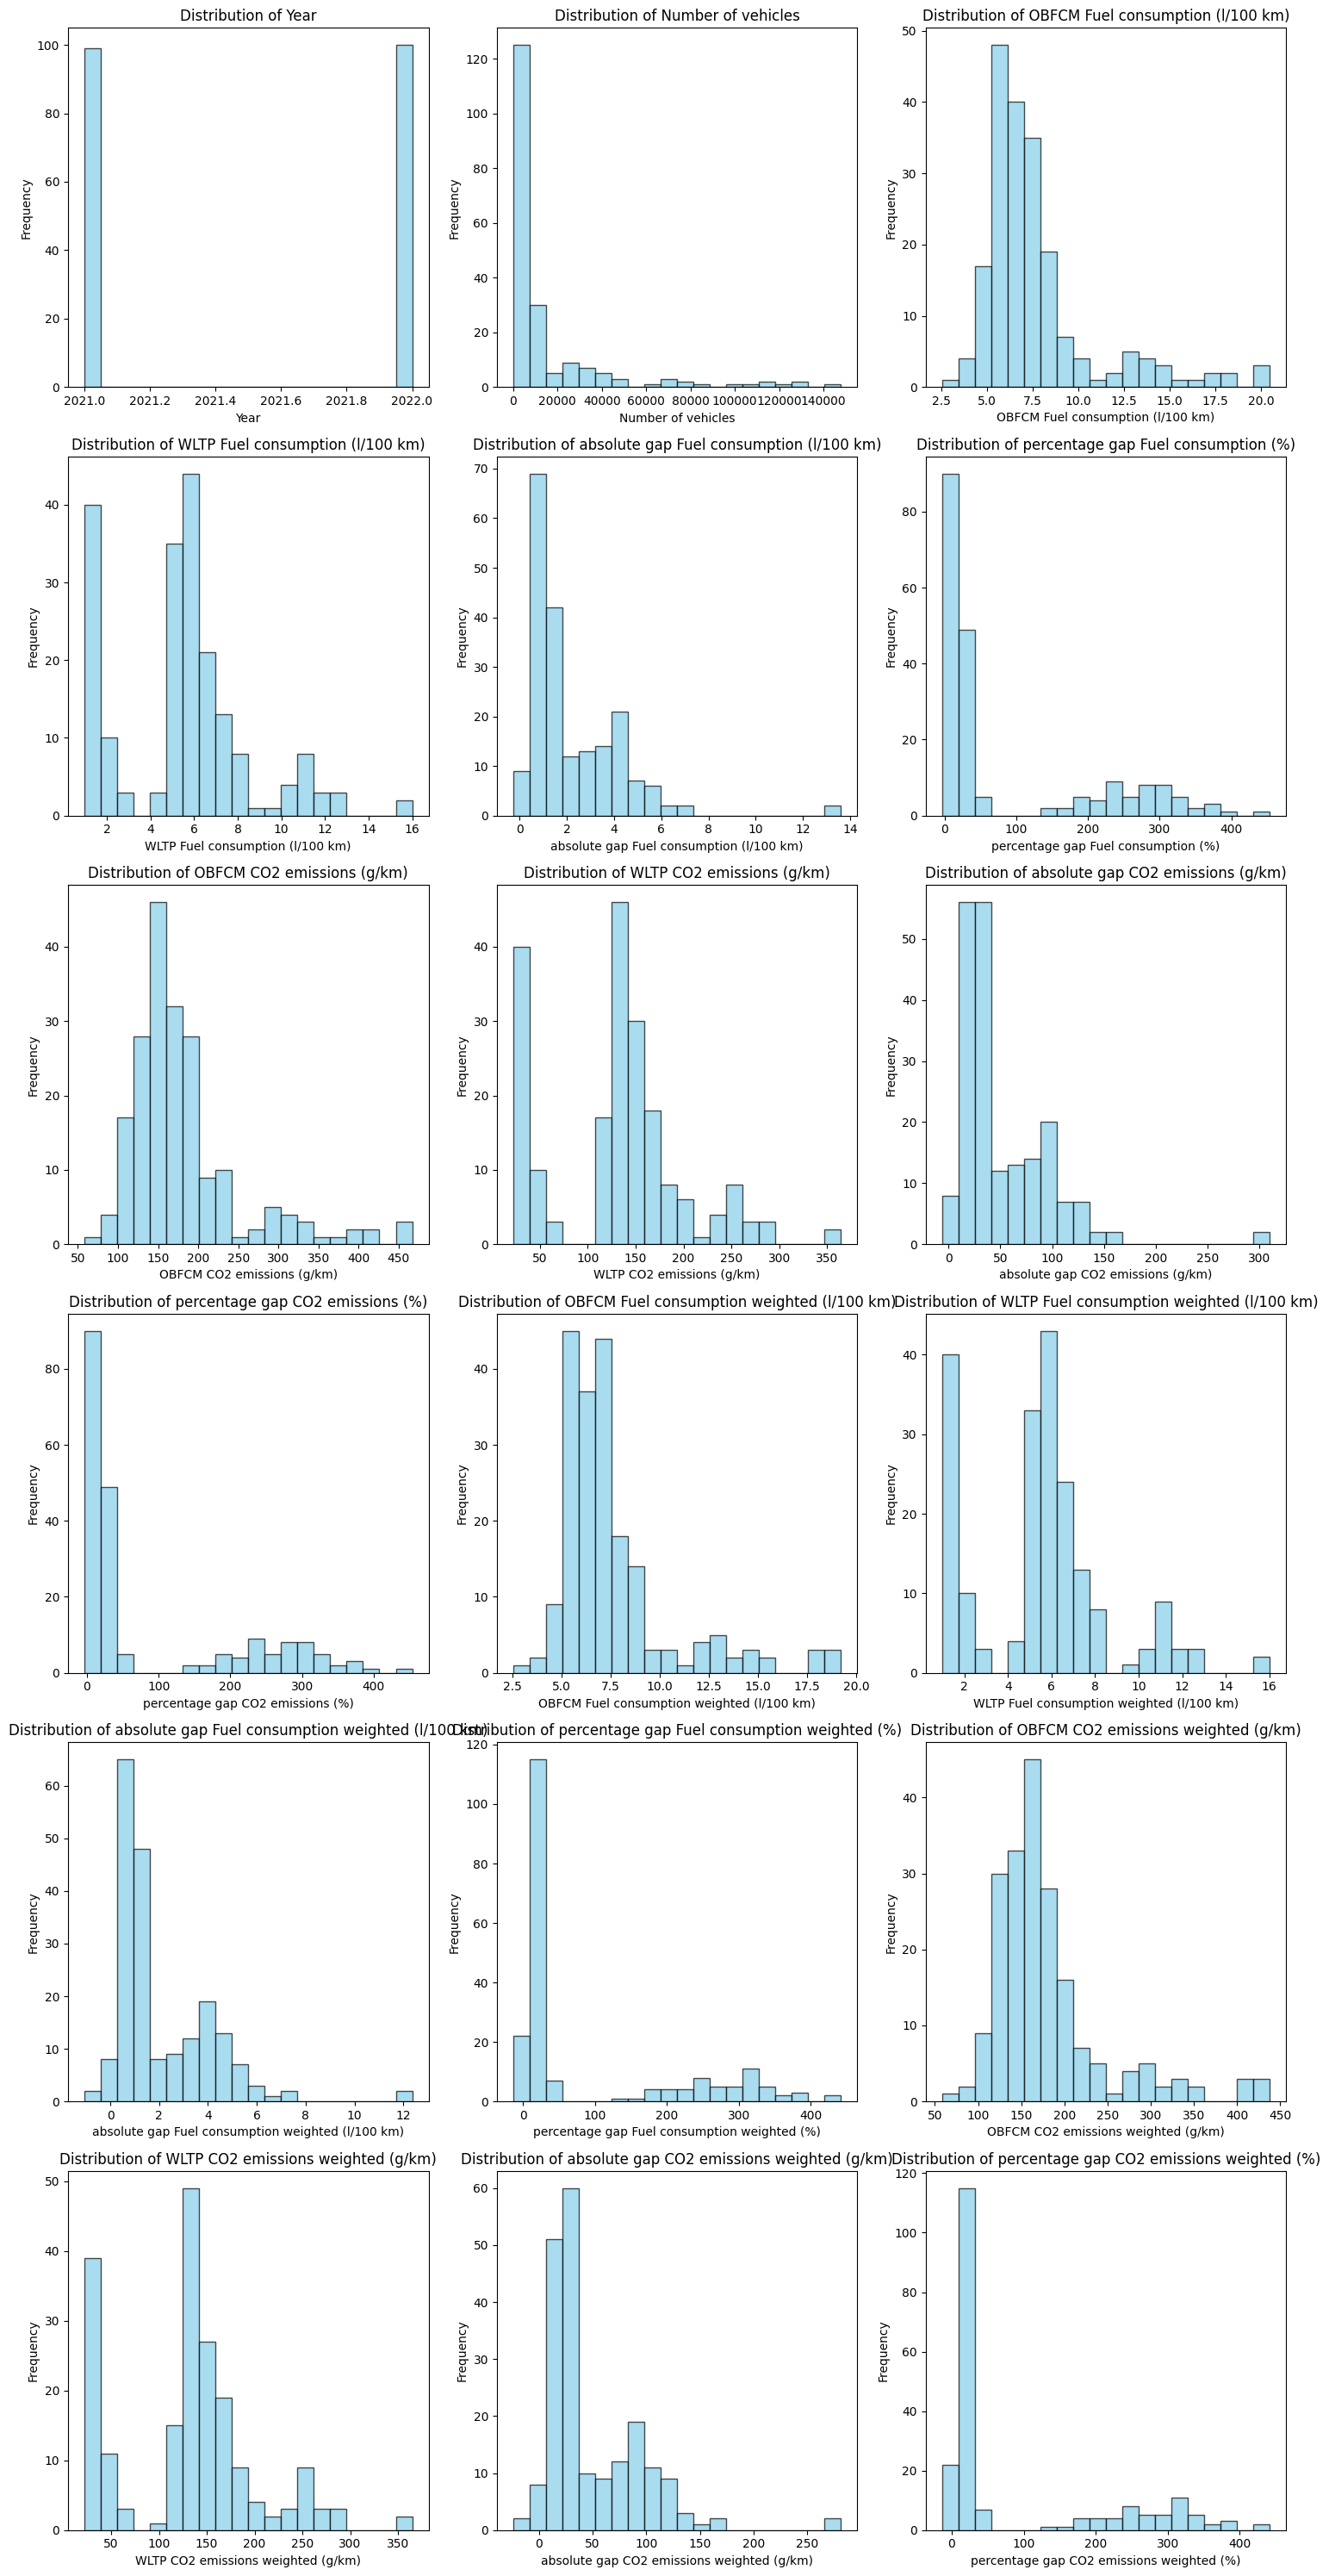

In [38]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = len(numeric_columns)

# Define the number of rows in my subplots
rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)
cols = 3

# Create my subplots 
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Show the distribution
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# Drop the unused axis
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

#### Correlation matrix

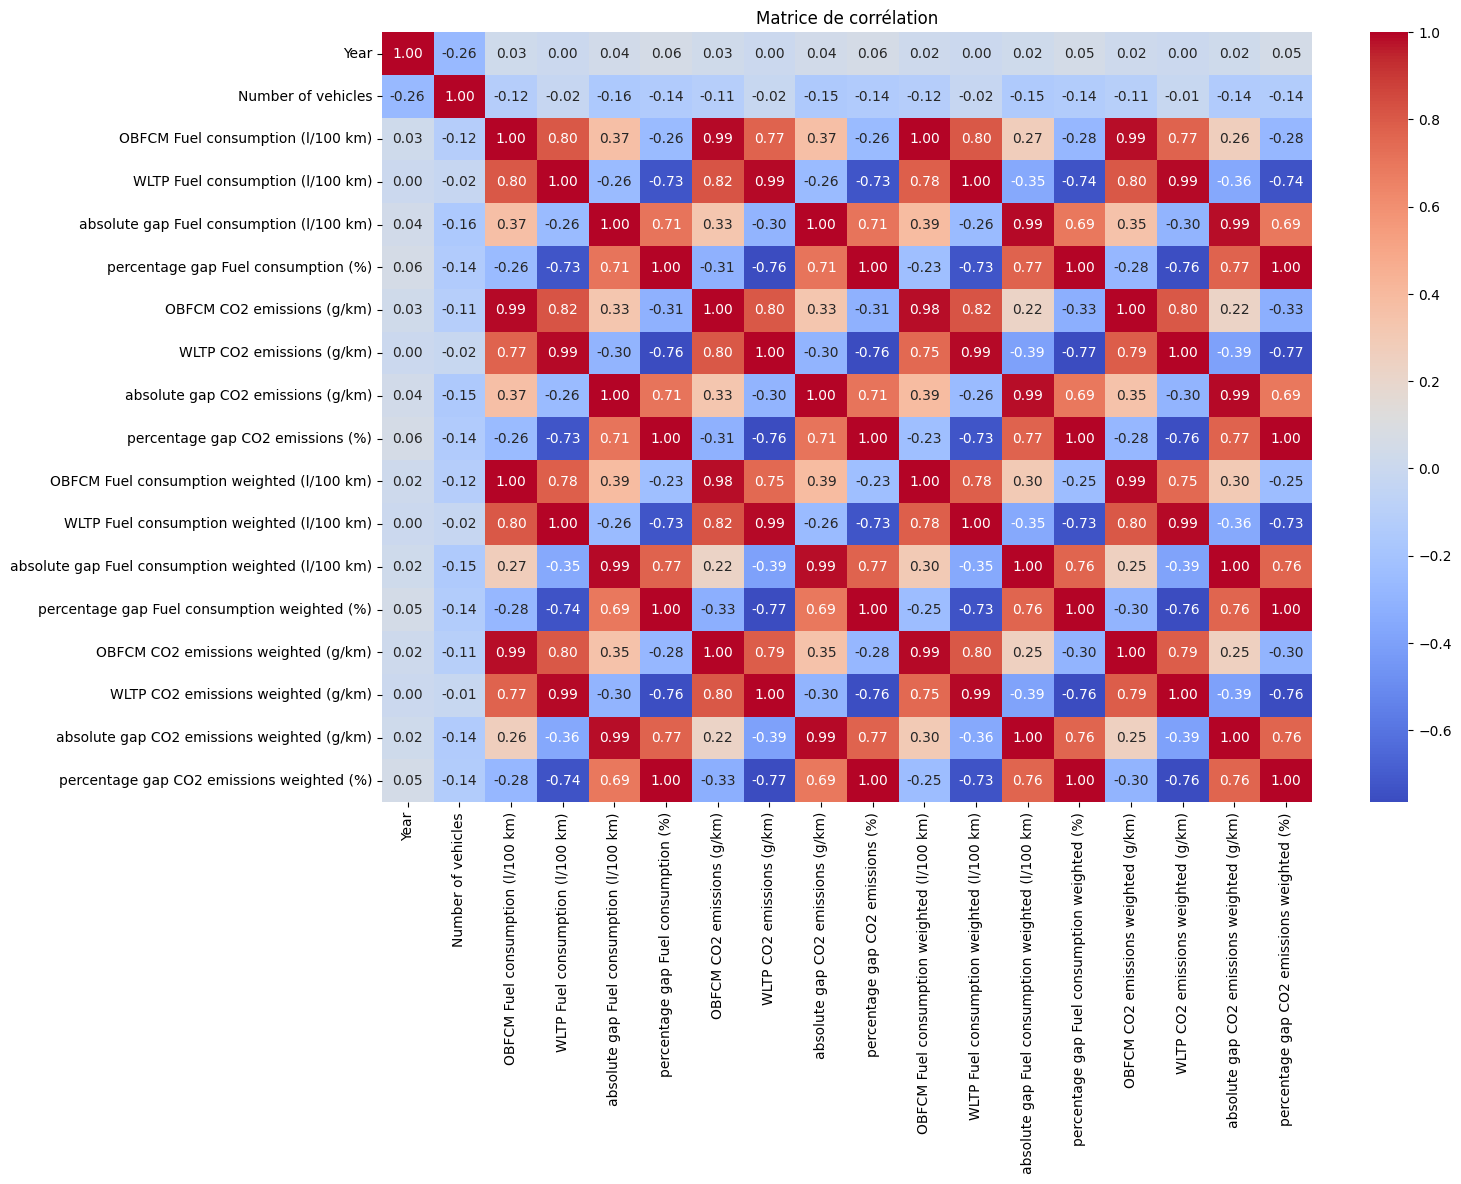

In [39]:
#to only take numerical variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


### Filtered dataset

By considering the correlation matrix and the different prediction we want to dive into. These are the different variables we are going to save. 

In [49]:
selected_features = [
    "Number of vehicles",
    "Fuel Type",
    "absolute gap Fuel consumption (l/100 km)",
    "percentage gap Fuel consumption (%)",
    "OBFCM CO2 emissions (g/km)"  # target
]

# filter df columns 
filtered_data = df[selected_features]

# categorical valriable encoding 
filtered_data = pd.get_dummies(filtered_data, columns=["Fuel Type"], drop_first=True)


In [50]:
filtered_data.head(10)

,Number of vehicles,absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),Fuel Type_DIESEL/ELECTRIC,Fuel Type_PETROL,Fuel Type_PETROL/ELECTRIC
0,11257,1.18,18.27,174.28,False,True,False
1,15821,1.10,18.52,184.40,False,False,False
2,11071,1.17,20.90,153.91,False,True,False
3,395,4.79,292.82,146.26,False,False,True
4,70090,1.68,24.45,194.53,False,True,False
5,375,0.91,15.20,180.71,False,False,False
6,2782,4.76,264.41,149.41,False,False,True
7,8770,1.84,16.77,292.70,False,True,False
8,14511,1.15,18.97,163.83,False,True,False
9,1512,4.78,189.58,166.21,False,False,True


### Machine learning model 

#### Separating features and target

In [51]:
X = filtered_data.drop(columns=["OBFCM CO2 emissions (g/km)"])
y = filtered_data["OBFCM CO2 emissions (g/km)"]

#### The train test split 

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
#Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Linear regression

In [54]:
from sklearn.linear_model import LinearRegression

# Initialiser et entraîner le modèle
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prédire sur les données de test
y_pred = model.predict(X_test_scaled)

In [55]:

from sklearn.metrics import mean_squared_error, r2_score

# metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R²: 0.77
RMSE: 27.43


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


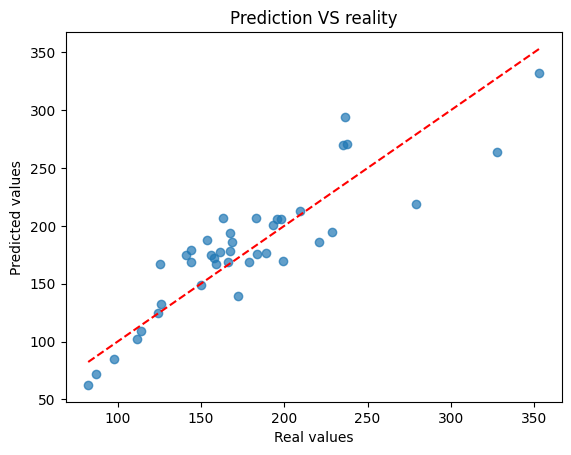

In [61]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Prediction VS reality")
plt.show()

#### Random forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)


In [63]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
# Prediction
y_pred_rf = model_rf.predict(X_test)

# the metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"R² (Random Forest): {r2_rf:.2f}")
print(f"RMSE (Random Forest): {rmse_rf:.2f}")


R² (Random Forest): 0.76
RMSE (Random Forest): 27.62


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
# cross validation 
from sklearn.model_selection import cross_val_score

# Validation croisée sur 5 plis
cv_scores = cross_val_score(model_rf, X, y, cv=5, scoring="r2")
print(f"R² moyen avec validation croisée : {cv_scores.mean():.2f}")


R² moyen avec validation croisée : 0.79


#### Hyperparameter ajustment 

In [68]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters that should be tested 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Testing with cross validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# Best hyperparamters 
print("The best hyperparameters are :", grid_search.best_params_)


The best hyperparameters are : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


#### Optimized random forest 

In [70]:
# Retrain the model with the best hyperparamters 
optimized_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

optimized_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [72]:

y_pred_optimized = optimized_rf.predict(X_test)


r2_optimized = r2_score(y_test, y_pred_optimized)
rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)

print(f"R² (Optimized): {r2_optimized:.2f}")
print(f"RMSE (Optimized): {rmse_optimized:.2f}")


R² (Optimized): 0.79
RMSE (Optimized): 26.07


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Support Vector Machines (SVM)

In [78]:
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [79]:
svm_model.fit(X_train_scaled, y_train)

SVR()

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Metrics
r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)

print(f"R² (SVM) : {r2_svm:.2f}")
print(f"RMSE (SVM) : {rmse_svm:.2f}")


R² (SVM) : 0.06
RMSE (SVM) : 54.93


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Cross validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)


print("Best hyperparameters :", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters : {'C': 100, 'epsilon': 1, 'kernel': 'rbf'}


In [82]:
# Optimized model
best_svm = grid_search.best_estimator_

# Optimized predicitons
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Metrics
r2_best_svm = r2_score(y_test, y_pred_best_svm)
rmse_best_svm = mean_squared_error(y_test, y_pred_best_svm, squared=False)

print(f"R²  : {r2_best_svm:.2f}")
print(f"RMSE  : {rmse_best_svm:.2f}")


R²  : 0.76
RMSE  : 27.68


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Deep learning model 

#### Prepare data for deep learning

In [73]:
import numpy as np

# Standardization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting data into a numpy arrays for tensorflow / keras 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)


#### The construction of the deep learning model 

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Layer 1
    Dense(32, activation='relu'),  # Layer 2
    Dense(1)  
])

# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Train the model 

In [76]:
history = model.fit(
    X_train_scaled, y_train_array,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 39253.1875 - mean_squared_error: 39253.1875 - val_loss: 42907.8945 - val_mean_squared_error: 42907.8945
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37211.1445 - mean_squared_error: 37211.1445 - val_loss: 42831.8828 - val_mean_squared_error: 42831.8828
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35507.0820 - mean_squared_error: 35507.0820 - val_loss: 42753.8984 - val_mean_squared_error: 42753.8984
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39405.5977 - mean_squared_error: 39405.5977 - val_loss: 42675.5703 - val_mean_squared_error: 42675.5703
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35326.8906 - mean_squared_error: 35326.8906 - val_loss: 42597.7227 - val_mean_squared_error: 42597.7227
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39228.0078 - mean_squared_error: 39228.0078 - val_loss: 42518.2422 - val_mean_squared_error: 42518.2422
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━

#### Model accuracy 

In [77]:
from sklearn.metrics import r2_score

# evaluate the model on test datas
test_loss, test_mse = model.evaluate(X_test_scaled, y_test_array, verbose=0)

print(f"Mean Squared Error on the test set : {test_mse:.2f}")

# Prediction
y_pred_dl = model.predict(X_test_scaled)

# R²
from sklearn.metrics import r2_score
r2_dl = r2_score(y_test_array, y_pred_dl)
print(f"R² (Deep Learning) : {r2_dl:.2f}")


Mean Squared Error on the test set : 1668.90
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
R² (Deep Learning) : 0.48


#### Optimization

In [83]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)), 
    Dense(64, activation='relu'), 
    Dropout(0.3),  
    Dense(32, activation='relu'),  
    Dense(1) 
])


optimizer = Adam(learning_rate=0.001)


model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train_scaled, y_train_array,
    validation_split=0.2,
    epochs=200,  
    batch_size=32,  
    verbose=1
)


In [85]:
from sklearn.model_selection import KFold
import numpy as np

# K-fold validation
kf = KFold(n_splits=5)
val_scores = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_k, X_val_k = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_k, y_val_k = y_train_array[train_index], y_train_array[val_index]
    
    model.fit(X_train_k, y_train_k, epochs=100, batch_size=32, verbose=0)
    val_loss = model.evaluate(X_val_k, y_val_k, verbose=0)[0]
    val_scores.append(val_loss)

print(f"Validation Loss  : {np.mean(val_scores):.2f}")


Validation Loss  : 398.69


#### The learning curves 

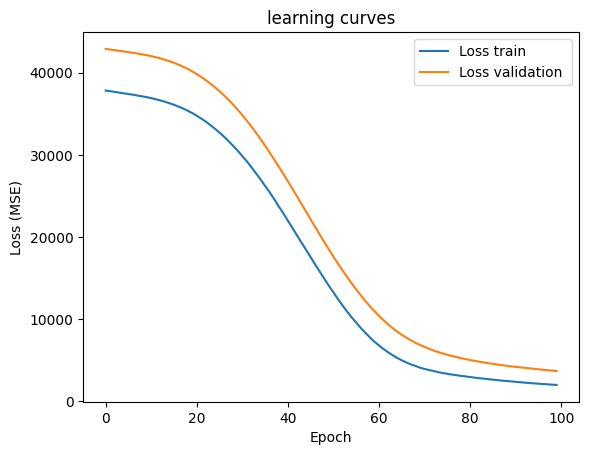

In [87]:
import matplotlib.pyplot as plt

# Loss curves
plt.plot(history.history['loss'], label='Loss train')
plt.plot(history.history['val_loss'], label='Loss validation ')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title("learning curves")
plt.show()


In [89]:
test_loss, test_mse = model.evaluate(X_test_scaled, y_test_array, verbose=0)
print(f"Mean Squared Error on the test set : {test_mse:.2f}")


y_pred_optimized = model.predict(X_test_scaled)
r2_optimized = r2_score(y_test_array, y_pred_optimized)
print(f"R²: {r2_optimized:.2f}")


Mean Squared Error on the test set : 140.07
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
R²: 0.96
